Saving Chapter_32_Labour_and_Employment-Table_32.9_All_India.csv to Chapter_32_Labour_and_Employment-Table_32.9_All_India.csv


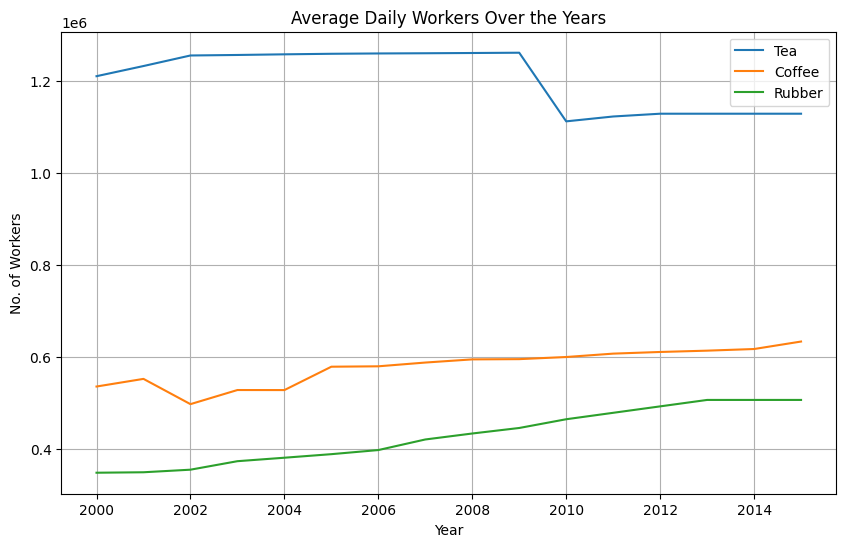

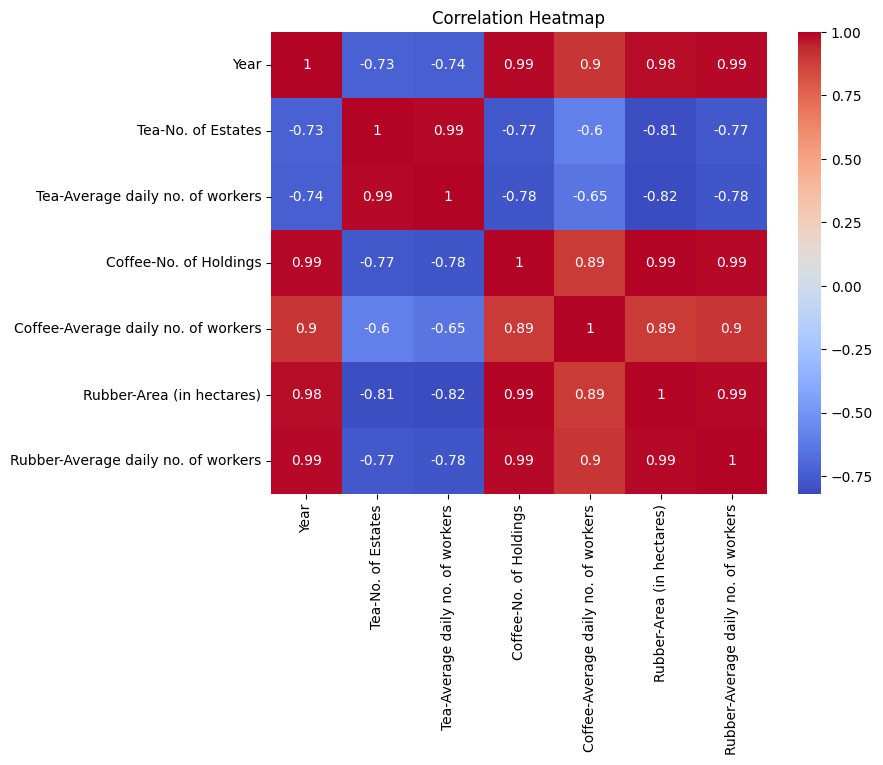

Linear Regression R² Score: -0.7275216682206553
Random Forest R² Score: 0.7207156210625791


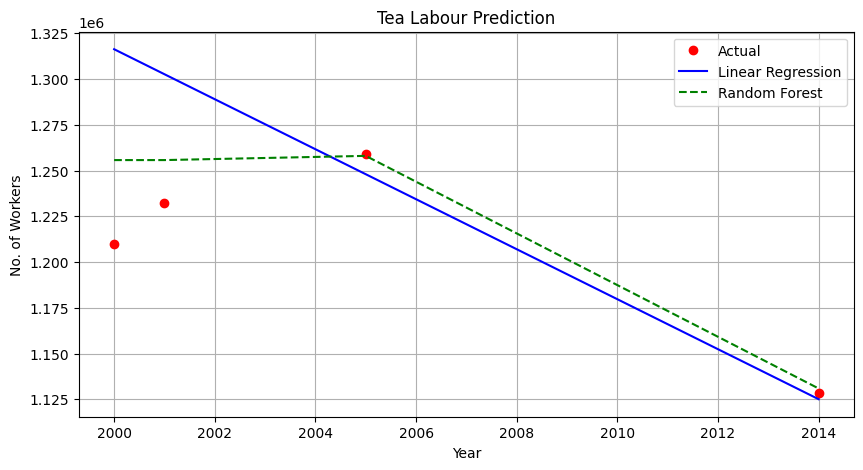

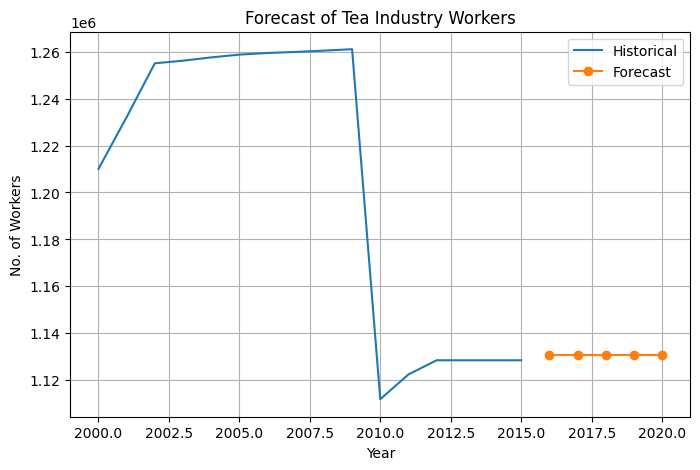

In [ ]:
# Labour and Employment Analytics Project
# Dataset: All-India Labour Data for Tea, Coffee, and Rubber Industries

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()  # Upload the CSV file here

import io
df = pd.read_csv(io.BytesIO(uploaded['Chapter_32_Labour_and_Employment-Table_32.9_All_India.csv']))

# Step 3: Clean and Preprocess
df.columns = df.columns.str.strip()
df['Rubber-Average daily no. of workers'] = pd.to_numeric(
    df['Rubber-Average daily no. of workers'].astype(str).str.replace(',', ''), errors='coerce'
)

# Interpolate missing values
df = df.interpolate()

# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Tea-Average daily no. of workers', data=df, label='Tea')
sns.lineplot(x='Year', y='Coffee-Average daily no. of workers', data=df, label='Coffee')
sns.lineplot(x='Year', y='Rubber-Average daily no. of workers', data=df, label='Rubber')
plt.title('Average Daily Workers Over the Years')
plt.xlabel('Year')
plt.ylabel('No. of Workers')
plt.legend()
plt.grid(True)
plt.show()

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Feature Scaling
features = df.drop(columns=['Year'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 6: Machine Learning - Predicting Tea Workers
X = df[['Year']]
y = df['Tea-Average daily no. of workers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 7: Evaluation
print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(X_test, y_test, 'ro', label='Actual')
plt.plot(X_test, y_pred_lr, 'b-', label='Linear Regression')
plt.plot(X_test, y_pred_rf, 'g--', label='Random Forest')
plt.title("Tea Labour Prediction")
plt.xlabel("Year")
plt.ylabel("No. of Workers")
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Forecasting for Next 5 Years (Tea Workers)
future_years = pd.DataFrame({'Year': range(df['Year'].max() + 1, df['Year'].max() + 6)})
future_predictions = rf.predict(future_years)

plt.figure(figsize=(8, 5))
plt.plot(df['Year'], df['Tea-Average daily no. of workers'], label='Historical')
plt.plot(future_years['Year'], future_predictions, label='Forecast', marker='o')
plt.title("Forecast of Tea Industry Workers")
plt.xlabel("Year")
plt.ylabel("No. of Workers")
plt.legend()
plt.grid(True)
plt.show()